In [1]:
# Import pandas and import data from csv
import pandas as pd

customer_data = pd.read_csv('customerdata4.csv')

In [2]:
# Look at the data headers to see what we can work with
customer_data.head()

,CustomerID,Gender,Age,Annual Income (10kkr),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Get a brief summary of the data
customer_data.describe()

,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Age', ylabel='Gender'>

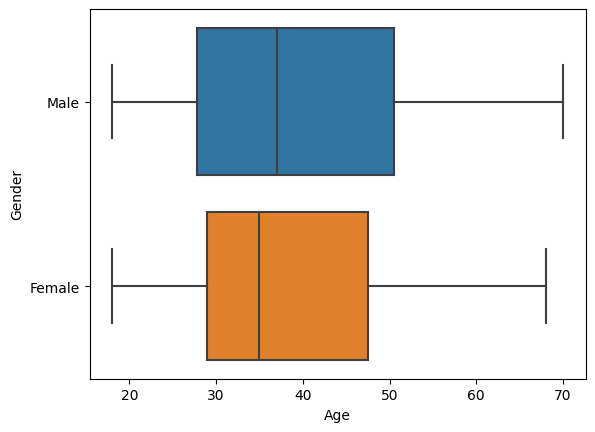

In [4]:
# Import seaborn for plotting
import seaborn as sns

# Analyze the age distribution grouped by gender
sns.boxplot(data=customer_data, x="Age", y="Gender")

<Axes: xlabel='Annual Income (10kkr)', ylabel='Gender'>

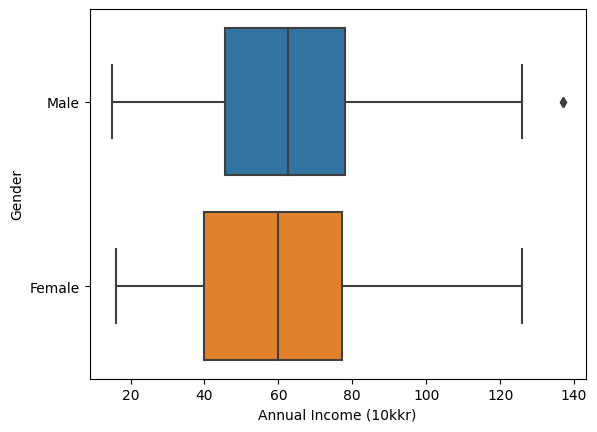

In [5]:
# Analyze the income distribution grouped by gender
sns.boxplot(data=customer_data, x="Annual Income (10kkr)", y="Gender")

<Axes: xlabel='Spending Score (1-100)', ylabel='Gender'>

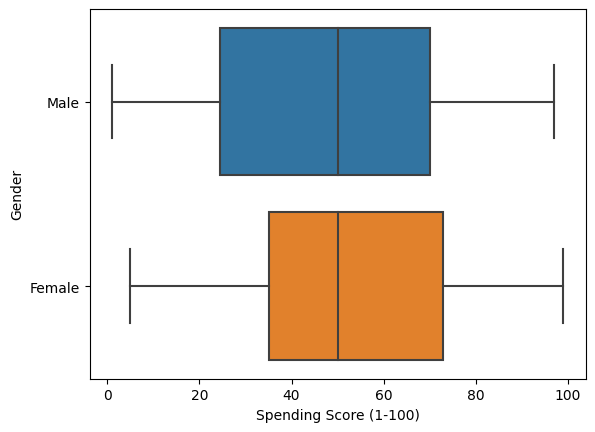

In [6]:
# Analyze the spending score grouped by gender
sns.boxplot(data=customer_data, x="Spending Score (1-100)", y="Gender")

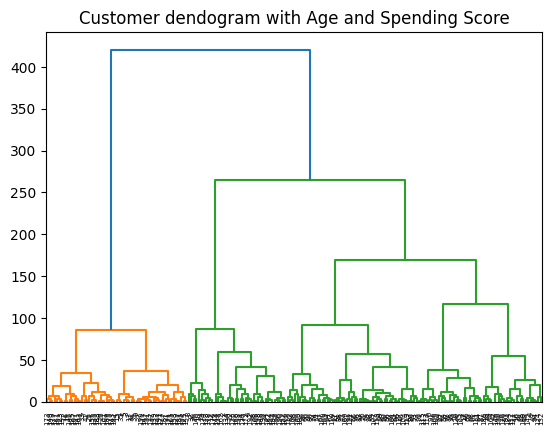

In [7]:
# Import matplotlib for plotting and scipy to generate dendrogram
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc

# Create new data sets with only the data that we will analyze
data_age_score = customer_data.iloc[:, [2,4]].values
data_income_score = customer_data.iloc[:, [3,4]].values

# Dendrogram 1 - Age & Spending Score
plt.title("Customer dendogram with Age and Spending Score")
dend = shc.dendrogram(shc.linkage(data_age_score, method='ward'))

Text(0, 0.5, 'Sum of squared distance')

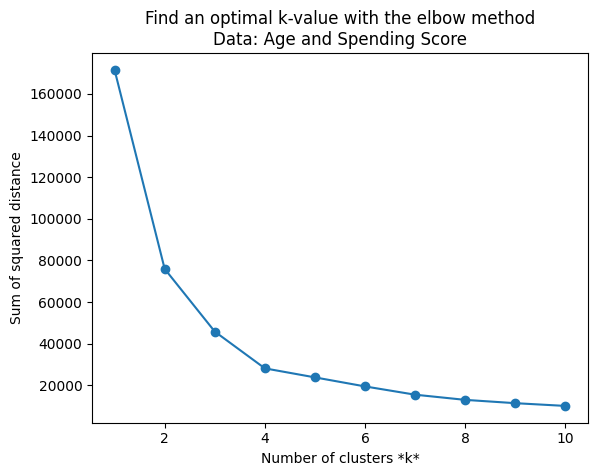

In [8]:
# Import sklearn for clustering
from sklearn.cluster import KMeans

# k_list is the list of range in between we want to find clusters for
k_list = list(range(1, 11))

# SSE is the Sum of Squared Errors
sse = []

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k, n_init=10)
    
    # fitting the data (data is the data set) to km_model
    km_model.fit(data_age_score)
    sse.append(km_model.inertia_)

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
plt.plot(k_list, sse, '-o')
plt.title('Find an optimal k-value with the elbow method\nData: Age and Spending Score')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

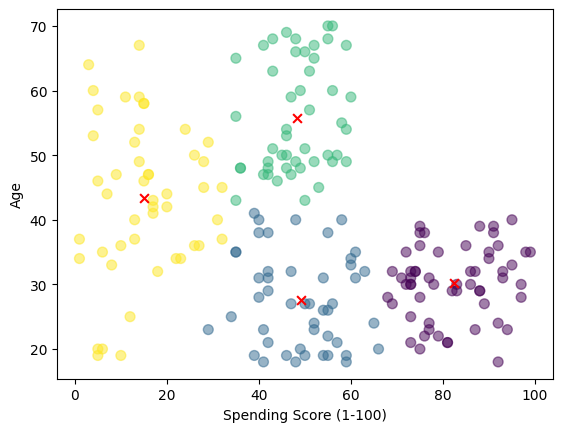

In [9]:
# Set the number of clusters
k = 4

# Run clustering on "Age & Spending Score" data set
#kmeans = KMeans(n_clusters=k).fit(data_age_score)
kmeans = KMeans(n_clusters=k, n_init=10, init = 'k-means++').fit(data_age_score)
centroids = kmeans.cluster_centers_

# Create a scatter plot with our results from the clustering
plt.scatter(data_age_score[:,1], data_age_score[:,0], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=40, marker='x') # type: ignore

plt.ylabel('Age')
plt.xlabel('Spending Score (1-100)')

plt.show()

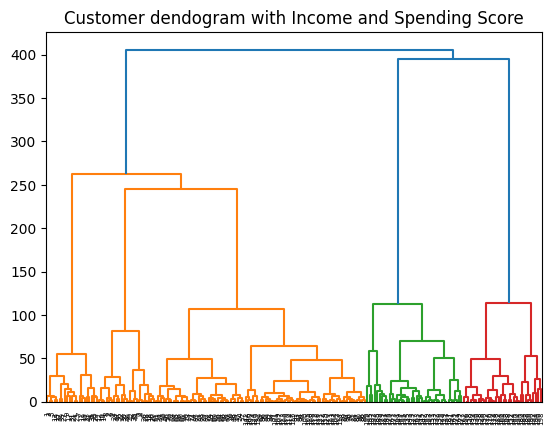

In [10]:
# Dendrogram 2 - Income & Spending Score
plt.title("Customer dendogram with Income and Spending Score")
dend = shc.dendrogram(shc.linkage(data_income_score, method='ward'))

Text(0, 0.5, 'Sum of squared distance')

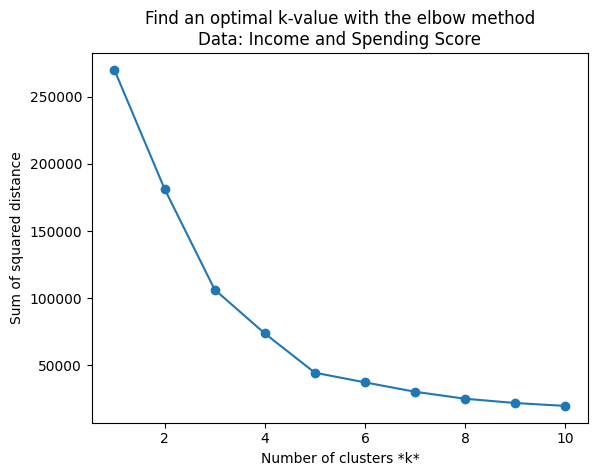

In [11]:
# k_list is the list of range in between we want to find clusters for
k_list = list(range(1, 11))

# SSE is the Sum of Squared Errors
sse = []

for k in k_list:
    # km_model is the KMeans where we define the model for fitting the data
    km_model = KMeans(n_clusters=k, n_init=10)
    
    # fitting the data (data is the data set) to km_model
    km_model.fit(data_income_score)
    sse.append(km_model.inertia_)

# Plot sse against k and find the value of k where it starts to flatten down and make angle like elbow.
plt.plot(k_list, sse, '-o')
plt.title('Find an optimal k-value with the elbow method\nData: Income and Spending Score')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

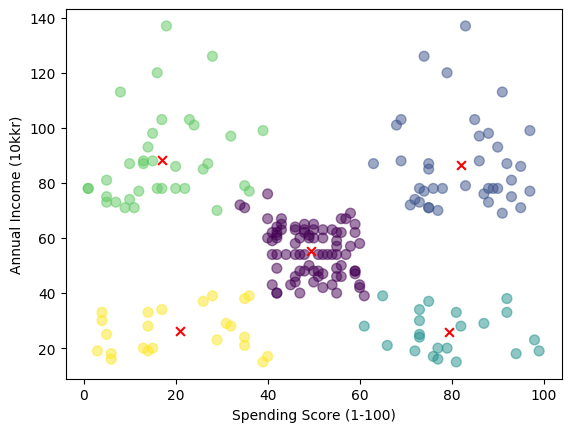

In [12]:
# Set the number of clusters k
k = 5

# Run clustering on "Income & Spending Score" data set
#kmeans = KMeans(n_clusters=k).fit(data_income_score)
kmeans = KMeans(n_clusters=k, n_init=10, init = 'k-means++').fit(data_income_score)
centroids = kmeans.cluster_centers_

# Create a scatter plot with our results from the clustering
plt.scatter(data_income_score[:,1], data_income_score[:,0], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', s=40,marker='x') # type: ignore

# Print labels for the two axis
plt.ylabel('Annual Income (10kkr)')
plt.xlabel('Spending Score (1-100)')

plt.show()